# SD212: Graph mining
## Lab 3 : Power Law & Small-world property

You **must** be connected to Telecom ParisTech network!

# Getting started

In [1]:
from connector import Connector

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
base_url = 'http://137.194.192.13:8234'
lab_id = 'lab3'

### To do

* Enter your login and test it using question #0

In [85]:
# Enter your login (family name + first letter of first name)
login = 'zhuf'

In [86]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [87]:
get_question(0)

Welcome!


# Import

In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
import networkx as nx

In [90]:
from IPython.display import HTML

# Load the OpenFlights graph

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [91]:
graph = nx.read_graphml('openflights.graphml', node_type=int)

In [92]:
print(nx.info(graph))

Name: openflight
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [93]:
index2name = {node: graph.node[node]["name"] for node in graph}
name2index = {graph.node[node]["name"]: node for node in graph}

You can use the `name2index` dictionary to find the index of a given node.
You can use the `inde2name` dictionary to find the name of a given node index.

In [94]:
print(name2index['Pau Pyrénées Airport'])
print(index2name[592])

592
Pau Pyrénées Airport


# 1. Path lengths

## Let's play a game

### To do

Use the manual exploration https://openflights.org to find a path between the following pairs of airports.

*Example*:
- *Question*: Source **Pau Pyrénées Airport, France** (PUF) Target **Tampa International Airport, United States** (TPA)
- *Path found*: Pau Pyrénées Airport (PUF) -> Charles de Gaulle (CDG) -> Los Angeles (LAX) -> Tampa (TPA)
- The length of this path is 3.

In [95]:
HTML('<img src="https://s3.eu-west-3.amazonaws.com/telecom-lecture/game.gif">')

Now it's your turn! Find paths between the following 3 pairs of airports.

1. Source **Okayama Airport, Japan** (OKJ) Target **Tampa International Airport, United States** (TPA).
2. Source **Charlottesville Albemarle Airport** (CHO) Target **Skopje Alexander the Great Airport** (SKP).
3. Source **Wuhan Tianhe International Airport** (WUH) Target **Maya-Maya Airport** (BZV).

What is the average length of the paths that you have found? Note down the result, you will be asked about it later.

## Shortest paths with NetworkX

You can use the `nx.shortest_path` function to find a shortest path between two airports.

In [96]:
source = "Pau Pyrénées Airport"
destination = "Tampa International Airport"
path = nx.shortest_path(graph, name2index[source], name2index[destination])
print ("Path between {} and {}:\n{}".format(source, destination, ' -> '.join([index2name[index] for index in path])))

Path between Pau Pyrénées Airport and Tampa International Airport:
Pau Pyrénées Airport -> Charles de Gaulle International Airport -> Lester B. Pearson International Airport -> Tampa International Airport


You can use the `nx.has_path` function to check if there is a path between two airports.

In [97]:
source = "Darwin International Airport"
destination = "Charles de Gaulle International Airport"
has_path = nx.has_path(graph, name2index[source], name2index[destination])
print ("Is there a path between {} and {}:\n{}".format(source, destination, has_path))

Is there a path between Darwin International Airport and Charles de Gaulle International Airport:
True


Let's plot the path.

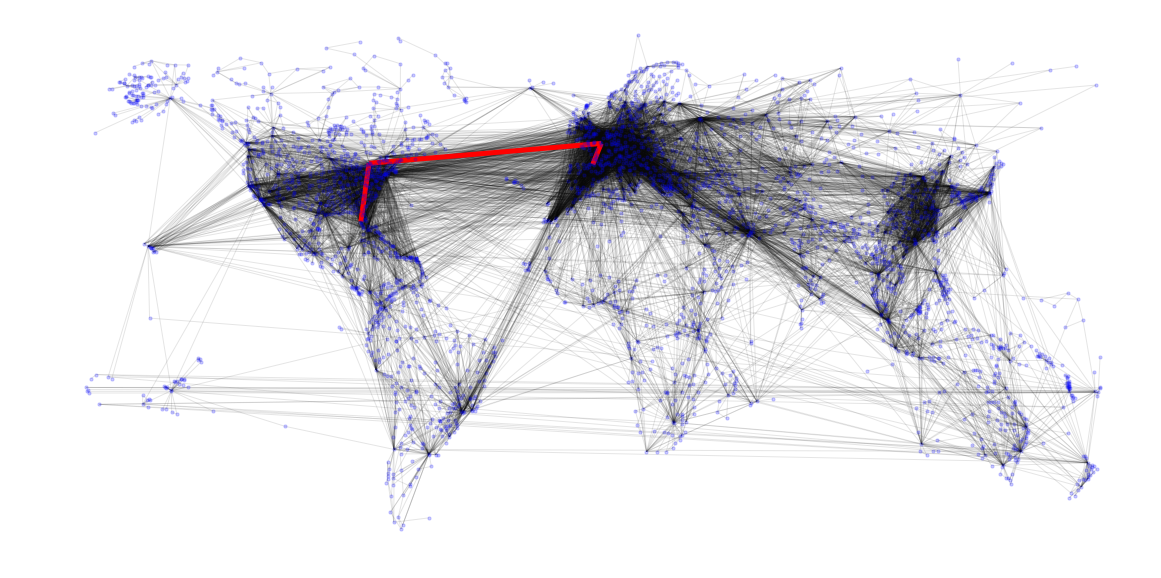

In [98]:
source = "Pau Pyrénées Airport"
destination = "Tampa International Airport"
path = nx.shortest_path(graph, name2index[source], name2index[destination])
plt.figure(figsize=(20,10))
plt.axis('off')
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
pos = {node: [graph.node[node]['pos_x'], graph.node[node]['pos_y']] for node in graph.nodes()}
nx.draw_networkx_nodes(graph, pos=pos, node_size=10, node_color='b', alpha=0.2)
nx.draw_networkx_edges(graph, pos=pos, alpha=.1)
nx.draw_networkx_edges(graph, pos=pos, edgelist=path_edges, edge_color='r', width=5)
plt.show()

### To do
- Answer question #1 (**0.5 point**)
- Plot the path that you find.

In [100]:
arg = get_question(1)
print(arg)

What is the length of the shortest path between the airports given in arguments?
(Check the argument; enter an integer)
{'source': 'Pescara International Airport', 'destination': 'Bharatpur Airport'}


In [107]:
answer =  nx.shortest_path(graph, name2index[arg['source']], name2index[arg['destination']] )
answer = len(answer) - 1
print(answer)

5


In [108]:
post_answer(1, answer)

This is correct!


### To do
- Using NetworkX, find the length of the shortest paths between the 3 pairs of airports given above during the game. Compare the result with what you found manually.

## Path length between random pairs of nodes

### To do
- Answer question #2 (**0.5 point**)
- Plot the distribution of shortest path length between the $100$ pairs of sources and targets given in question #3.

In [111]:
arg = get_question(2)
print(arg)

We picked 100 random pairs of nodes for you (see arguments).
What is the average length of the shortest paths between these pairs of sources and targets?

{'pair_list': [['Sunyani Airport', 'Canaima Airport'], ['Portsmouth International at Pease Airport', 'Grande Prairie Airport'], ['Paris-Orly Airport', 'Nelson Ribeiro Guimarães Airport'], ['Babelthuap Airport', 'Taoxian Airport'], ['Mohammed V International Airport', 'Diqing Airport'], ['Poitiers-Biard Airport', 'Brunswick Golden Isles Airport'], ['Appleton International Airport', 'Pevek Airport'], ['Kotoka International Airport', 'Modesto City Co-Harry Sham Field'], ['Piloto Osvaldo Marques Dias Airport', 'Saint John Airport'], ['Kwethluk Airport', 'Rotterdam The Hague Airport'], ['Tiksi Airport', 'Chek Lap Kok International Airport'], ['Charles de Gaulle International Airport', 'El Paso International Airport'], ['Anaktuvuk Pass Airport', 'Fort Chipewyan Airport'], ['Kefallinia Airport', 'Johan Adolf Pengel International Airport'], 

In [113]:
lens = []
for x in arg['pair_list']:
    length = nx.shortest_path_length(graph, name2index[x[0]], name2index[x[1]] )
    lens.append(length)
print(np.mean(lens))

3.95


In [114]:
answer = np.mean(lens)

In [115]:
post_answer(2, answer)

This is correct!


## Path length distribution from one node

For the following question, we recall the peudo-code of the classic [BFS algorithm](https://en.wikipedia.org/wiki/Breadth-first_search):

    Breadth-First-Search(Graph, root):

        create empty set S
        create empty queue Q   
        create empty dictionary depth

        add root to S
        Q.enqueue(root)
        depth[root] = 0

        while Q is not empty:
            current = Q.dequeue()
            for each node n that is adjacent to current:
                if n is not in S:
                    add n to S
                    depth[n] = depth[current] + 1
                    Q.enqueue(n)
        
        return S, depth
                    
Remark: you can use Python lists for queues.
- Empty queue: Q = list()
- Enqueue a: Q = [a] + Q
- Dequeue: b = Q.pop()

### To do
- Create a Python function `bfs(Graph, root)` which implements the BFS algorithm described above.
- Answer question #3 (**1.5 points**)
- Plot the distribution of shortest path lengths from the node given in question #3.

In [138]:
def breadth_first_search(graph, root):
    S = set()
    Q = list()
    depth = dict()

    S.add(root)
    Q = [root] + Q
    depth[root] = 0
    
    while len(Q) != 0:
        current = Q.pop()
        for node in graph.neighbors(current):
            if node not in S:
                S.add(node)
                depth[node] = depth[current] + 1
                Q = [node] + Q
    return S, depth

In [127]:
def bfs(Graph, root):
    S = set([])
    Q = list()
    depth = {}
    S.add(root)
    Q = [root] + Q
    depth[root] = 0
    
    while len(Q) != 0:
        current = Q.pop()
        for n in Graph.neighbors(current):
            if not n in S:
                S.add(n)
                depth[n] = depth[n] + 1
                Q = Q + [n]
    return S, depth

In [135]:
arg = get_question(3)
print(arg)

What is the number of shortest paths of length `length` (cf arguments) from the airport given in argument?

{'source': 'Meixian Airport', 'length': 8}


In [181]:
S, depth = breadth_first_search(graph, name2index['Meixian Airport'])
# S, depth = bfs(graph, name2index['Meixian Airport'])
print(S)
answer = 3

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [144]:
post_answer(3, answer)

This is correct!


# 2. Degree distribution

## Simple statistics

### To do
- Compute the maximum value, the minimum value, the average value and the standard deviation of the degrees in the graph
- Find the $10$ airports with the largest degrees
- Answer question #4 (**0.5 point**)

In [230]:
degrees = [y for x,y in graph.degree()]
maxV = np.max(degrees)
minV = np.min(degrees)
mean = np.mean(degrees)
std = np.std(degrees )
print(maxV, minV, mean, std)

237 1 11.748789150791088 24.84163959533936


In [205]:
get_question(4)

What is the standard deviation of the degree distribution of the graph?


In [206]:
answer = std

In [207]:
post_answer(4, answer)

This is correct!


## Power law property

### To do:
- Count the number of nodes with degree larger than $40$ ($N_{40} = \sum_{i=1}^{n} \mathrm{1}_{\{d_i > 40\}}$).
- Count the number of nodes with degree larger than $\frac{40}{2} = 20$ and the nb of nodes with degree larger than $\frac{20}{2} = 10$ (i.e. $N_{20}$ and $N_{10}$).
- What observation can we make about the ratios $\frac{N_{40}}{N_{20}}$ and $\frac{N_{20}}{N_{10}}$?

What are the values of $\gamma$ that correspond to the ratios $\frac{N_{40}}{N_{20}}$ and $\frac{N_{20}}{N_{10}}$?

In [219]:
N40 = [x for x in degrees if x > 40]
N20 = [x for x in degrees if x > 20]
N10 = [x for x in degrees if x >10 ]
print( len(N40) / len(N20))
print( len(N20) / len(N10))

0.5439429928741093
0.6200294550810015


## Plot the degree distribution

### To do:

- Build the NumPy array `N` such that:
$$\mathtt{N}[k] = \text{nb of nodes with degree } k = \sum_{i=1}^{n} \mathrm{1}_{\{d_i = k\}}$$
- Build the NumPy array `p` define as:
$$\mathtt{p}[k] = \frac{\text{nb of nodes with degree } k}{\text{total number of nodes}} = \frac{\mathtt{N}[k]}{n}$$
- Plot the degree distribution $\mathtt{p}[k]$ in function of $k$ with a linear scale.
- Plot the degree distribution using a scatter plot and a **log-log scale** (i.e. plot $\log(\mathtt{p}[k])$ in function of $\log(k)$).
- Use `scipy` to perform a linear regression on the log-log plot.
- Answer question #5 (**1 points**)

In [411]:
degrees = np.array([y for x,y in graph.degree()])
N = np.array([np.count_nonzero(degrees == k) for k in range(0, maxV+1) ])
P = N / len(index2name)
X = []
Y = []
for k in range(0, maxV + 1):
    val = np.count_nonzero(degrees == k)
    if val != 0:
        X.append(k)
        Y.append(val)

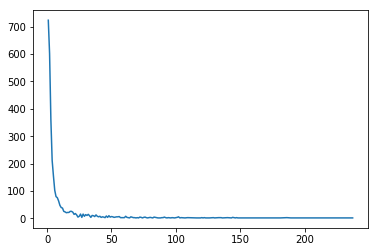

In [333]:
plt.plot(X, Y)

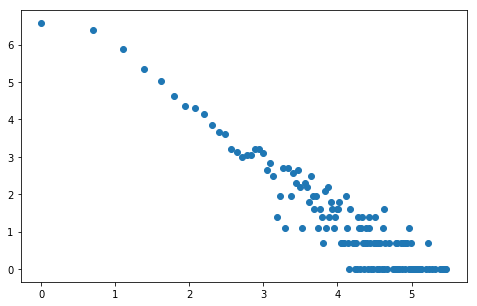

In [334]:
plt.figure(figsize=(8,5))
f = plt.scatter(np.log(X), np.log(Y))

In [335]:
import scipy.stats
model = scipy.stats.linregress(np.log(X), np.log(Y))
model

LinregressResult(slope=-1.3479457526628253, intercept=6.78966335256425, rvalue=-0.9450993470839322, pvalue=2.0441320145783002e-68, stderr=0.03981936377020472)

In [336]:
get_question(5)

What is the value of the power law parameter gamma that corresponds to the result of the linear regression?


In [337]:
answer = -model.slope
answer

1.3479457526628253

In [338]:
post_answer(5, answer)

This is correct!


## Plot the degree distribution with Logarithmic Binning

In the previous question, we use a **linear binning** to plot the degree distribution $p_k = \mathtt{p}[k]$.
Indeed each bin has the same size $\Delta k = 1$.
For a scale-free network linear binning results in instantly recognizable plateaus at large $k$,
consisting of numerous data points that form horizontal lines.

For **log-binning** we let the bin sizes increase with the degree, so that each bin has a comparable number of nodes.

The $i^{th}$ bin has size $2i-1$ and contains all nodes with degrees $k=2^{i-1}, 2^{i-1}+1, ..., 2^{i}-1$.

- The first bin has size $b_0 = 2^0 = 1$, containing all nodes with $k=1$;
- the second has size $b_1 = 2^1 = 2$, containing nodes with degrees $k=2,3$;
- the third bin has size $b_2 = 2^2=4$ containing nodes with degrees $k=4,5,6,7$;
- etc.

### To do:
- Based on `N`, build a list called `Nbins` such that the $i^{th}$ element of the list
is the number of nodes with degrees $k=2^{i-1}, 2^{i-1}+1, ..., 2^{i}-1$.
In other words: $$\mathtt{Nbins}[b] = \sum_{j=2^b}^{j=2^{b+1}-1} \mathrm{N}[j].$$
- Plot the degree distribution using Logarithmic Binning and a log-log scale:
    - build the array `pbins` such that: $\mathtt{pbins}[b] = \frac{\mathtt{Nbins}[b]}{2^b n}$, where $n = \text{total nb of nodes}$
    - plot $\log(\mathtt{pbins}[b])$ in function of $\log(2^b)$
- Use `scipy` to perform a linear regression on this plot.
- Answer question #6 (**1 points**)

1.167889052415257


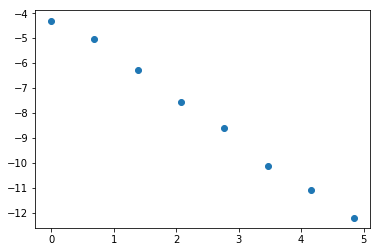

In [427]:
b_bin, NBins, pBins = [], [],[]

N ={X[i]:Y[i] for i in range(len(X))}

for b in range(0, int(math.log(maxV,2)) + 1) :
    k = range(2**b, 2**(b+1))
    sum_nb = 0
    for x,y in N.items():
        if y in k:
            sum_nb += 1
    if sum_nb == 0: continue
    b_bin.append(b)
    NBins.append(sum_nb)
    pBins.append(sum_nb / (2**b * len(name2index)))

plt.scatter(np.array(b_bin) * np.log(2),np.log(pBins))

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(b_bin, np.log(pBins))
answer = - slope
print(-slope)

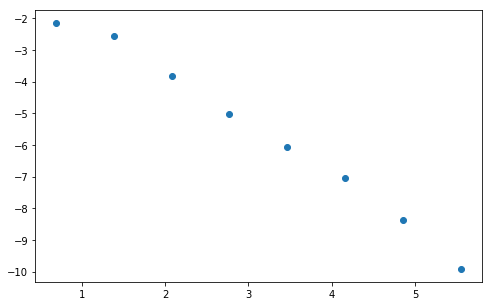

In [391]:
Nbins, pbins = [], []
nb_bins = int(np.ceil(np.log(max(Y)) / np.log(2)))

for b in range(nb_bins):
    cur_sum = 0
    for (i, y) in zip(X,Y):
        if  2**(b - 1) <= i and i < 2**b:
            cur_sum += y
    Nbins.append(cur_sum)
pbins = [Nbins[b] / ((2**b) * len(name2index)) for b in range(len(Nbins))]

plt.figure(figsize=(8,5))
X = np.log([2**i for i in range(len(pbins))])
f = plt.scatter(X, np.log(pbins))
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X[1:-1], np.log(pbins)[1:-1])
answer = - slope

In [339]:
get_question(6)

What is the value of the power law parameter gamma that corresponds to the result of the linear regression in logarithmic binning?


In [428]:
post_answer(6, answer)

(TIME EXPIRED) Wrong answer


# Conclusion on the OpenFlights dataset

### To do
- Answer question #7 (**open answer**)

In [314]:
get_question(7)

Using the results of this lab, comment the OpenFlights dataset.


In [315]:
post_text(7)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted
Answer posted
(NOT ALLOWED) Wait 5s before next answer.
Answer posted
Answer posted
Answer posted
Answer posted
(NOT ALLOWED) Wait 5s before next answer.
Answer posted
(NOT ALLOWED) Wait 5s before next answer.
(NOT ALLOWED) Wait 5s before next answer.
(NOT ALLOWED) Wait 5s before next answer.
(NOT ALLOWED) Wait 5s before next answer.
Answer posted
Answer posted
(TIME EXPIRED) Answer posted
